Deep Neural Network

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
# from utils.helper import fn_plot_tf_hist

In [3]:
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: accuracy
            column 1: loss
            column 2: val_accuracy
            column 3: val_loss
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]

    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n   test: {:6.4f}'
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel('Epochs')
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n  test:  {:6.4f}'
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.grid(True)
    ax.legend(loc = 'lower left')

    plt.tight_layout()

def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : labels in a dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    if isinstance(labels, dict):
        display_labels = labels.values()
    else:
        display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)

    fig, ax = plt.subplots(figsize = (4,4))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)

    # Disable the grid
    ax.grid(False)

    plt.show()


In [4]:
def df_plot_labels(train_df : pd.DataFrame,
                   test_df : pd.DataFrame):

    """
    Args:
        train_df : pd.DataFrame -> Data for training
        test_df : pd.DataFrame -> dta for validation

    return:
        None

    """
    # Plotting class distribution of Train set
    plt.subplot(1, 2, 1)
    ax = train_df["label"].value_counts().plot(kind = "bar",
                                               title = "Train data distribution",
                                               color = "DarkBlue",
                                               alpha = 0.8)

    # plotting class distribution of Validation set
    plt.subplot(1, 2, 2)
    ax = test_df["label"].value_counts().plot(kind = "bar",
                                               title = "test data distribution",
                                               color = "Orange",
                                               alpha = 0.8)

    plt.show()



## Convert into Datasets



In [5]:
def split_feature_label(row):
    """
    Args:
        row: array with 785 values
    return:
        features : np.ndarray of shape 28 x 28 x 1
        label : integer
    """
    # Take values from index 1 onwards and reshape to image
    features = tf.reshape(row[1:], [28, 28, 1])

    # take first values as label
    labels = row[0]
    return features, labels

In [6]:
# Create dataset


In [7]:
### ----------------------
### global variables
### ----------------------

import random

RANDOM_STATE = 24
tf.random.set_seed(RANDOM_STATE)


TEST_SIZE = 0.2
ALPHA = 0.001 # LEARNING RATE
EPOCHS = 100  # NUMBER OF ITERATIONS
BATCH_SIZE = 32

PATIENCE = 30
LR_FACTOR = 0.1
LR_PATIENCE = 10


params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium'
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

# Load Data

# EDA
1. Remove Null from Position
2. Read unique values from the columns

In [10]:
data_df = pd.read_csv("fashion-mnist_train.csv")
data_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train_cols = data_df.drop(["label"], axis = 1)
y_train_cols = data_df["label"].to_numpy()
x_train_cols.shape, y_train_cols.shape

((60000, 784), (60000,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_train_cols,
                                                    y_train_cols,
                                                    test_size = TEST_SIZE,
                                                    random_state = 24,
                                                    stratify = y_train_cols)

In [13]:
test_df = pd.read_csv("fashion-mnist_test.csv")
x_valid = test_df.drop("label", axis = 1).to_numpy()
y_valid = test_df["label"].to_numpy()

x_train.shape, x_test.shape, x_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((48000, 784), (12000, 784), (10000, 784), (48000,), (12000,), (10000,))

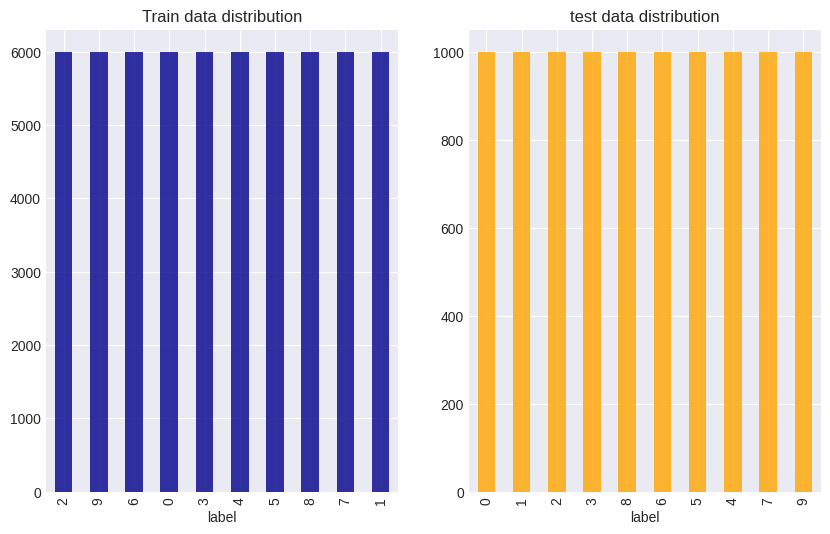

In [14]:
df_plot_labels(data_df, test_df)

In [15]:
# Nromalize the data between [0, 1]

x_train = x_train / 255.0

x_test = x_test / 255.0

x_valid = x_valid / 255.0

In [16]:
class_names = {0 : "T-shirt",
               1 : "Trousers",
               2 : "long sleeves",
               3 : "dress",
               4 : "hoodie",
               5 : "sandle",
               6 : "shirt",
               7 : "sneaker",
               8 : "bag",
               9 : "boot"}

In [17]:
tmp_ds = tf.data.Dataset.from_tensor_slices(data_df)
train_ds = tmp_ds.map(split_feature_label)
train_ds = train_ds.batch(BATCH_SIZE)

tmp_ds = tf.data.Dataset.from_tensor_slices(test_df)
test_ds = tmp_ds.map(split_feature_label)
test_ds = test_ds.batch(BATCH_SIZE)

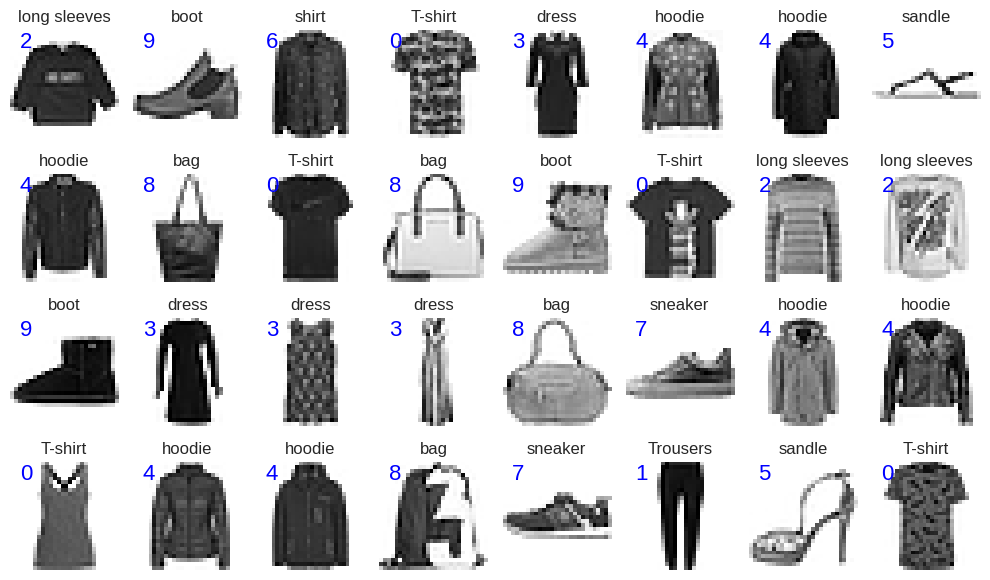

In [18]:
for images, labels in train_ds.take(1):

    for i in range(BATCH_SIZE):
        plt.subplot(BATCH_SIZE // 8, 8, i + 1)

        plt.grid(False)

        plt.imshow(images[i].numpy().astype("uint8"), cmap = plt.cm.binary)

        plt.title(class_names[labels[i].numpy().astype(int)])
        # display(labels[i].numpy().astype(int))

        plt.text(2, 4, labels[i].numpy(), color = 'b', fontsize = 16)

        plt.axis("off")

    plt.tight_layout()

    plt.show()



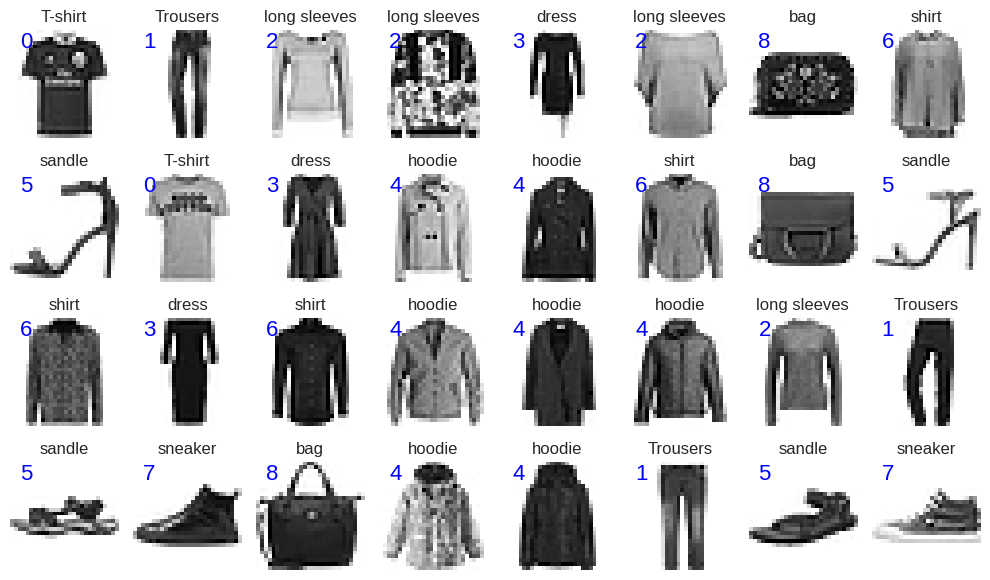

In [19]:
for images, labels in test_ds.take(1):

    for i in range(BATCH_SIZE):
        plt.subplot(BATCH_SIZE // 8, 8, i + 1)

        plt.grid(False)

        plt.imshow(images[i].numpy().astype("uint8"), cmap = plt.cm.binary)

        plt.title(class_names[labels[i].numpy().astype(int)])
        # display(labels[i].numpy().astype(int))

        plt.text(2, 4, labels[i].numpy(), color = 'b', fontsize = 16)

        plt.axis("off")

    plt.tight_layout()

    plt.show()

In [20]:
norm_layer = tf.keras.layers.Rescaling(1 / 255.)

img_batch, lbl_batch = next(iter(train_ds))

norm_ds = train_ds.map(lambda x, y: (norm_layer(x), y))

img_batch, lbl_batch = next(iter(norm_ds))

display(img_batch[0].numpy().min(), img_batch[0].numpy().max())

del norm_ds


0.0

1.0

In [21]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

# Prepare model




### Creation of convolutional Layer


<Axes: >

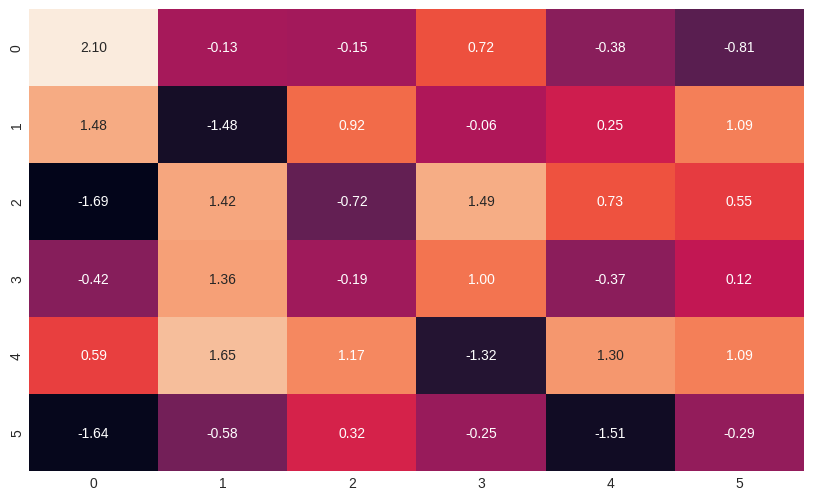

In [22]:
### Convolution Layer

input_shape = (1, 6, 6, 1)  # [batch, H, W, C]
x = tf.random.normal(input_shape)

sns.heatmap(x.numpy()[0, :, :, 0], annot = True, fmt = ".2f", cbar = False)

<Axes: >

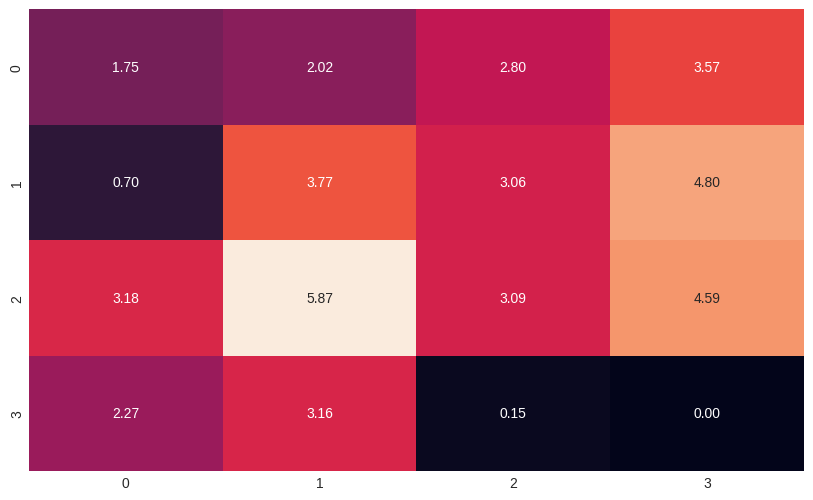

In [23]:
y = tf.keras.layers.Conv2D(1, 3,
                           kernel_initializer = tf.constant_initializer(1.0),
                           use_bias = False,
                           activation = "relu")(x)
sns.heatmap(y.numpy()[0, :, :, 0], annot = True, fmt = ".2f", cbar = False)

<Axes: >

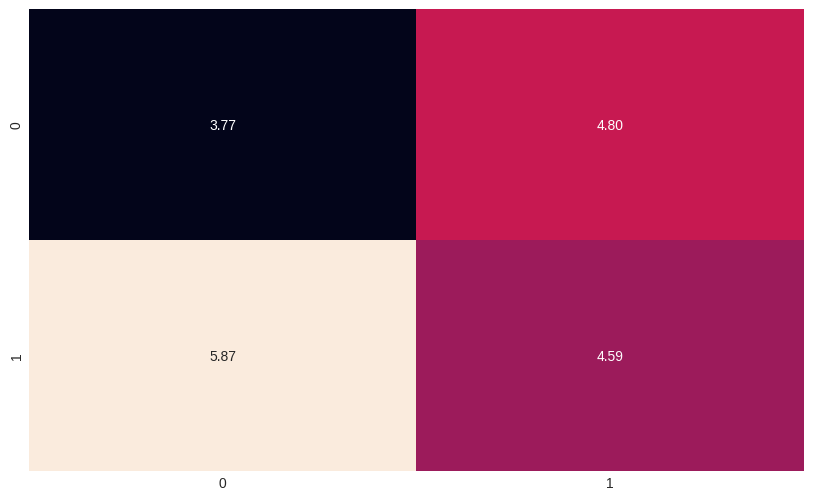

In [24]:
max_pool = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
                            strides = (2, 2),
                            padding = "valid")
z = max_pool(y)
sns.heatmap(z.numpy()[0, :, :, 0], annot = True, fmt = ".2f", cbar = False)

In [36]:
krnl_initializer = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)

krnl_reg = None # tf.keras.regularizers.L2(l2 = 0.01)

input_shape = (28, 28, 1)

# Dropout Rages

dor1 = 0.1
dor2 = 0.2
dor3 = 0.3
dor4 = 0.5


inputs = tf.keras.Input(shape = input_shape, name = "input")



x = tf.keras.layers.Rescaling(1. / 255.)(inputs)

### set 1
# Conv 1
x = tf.keras.layers.Conv2D(filters = 32,
                            kernel_size = (3, 3),
                           kernel_initializer= krnl_initializer,
                           kernel_regularizer = krnl_reg,
                           padding = "same",
                        #    activation = tf.keras.activations.relu,
                           name = "conv_1")(x)   # 28, 28, 32

# Batch Norm
x = tf.keras.layers.BatchNormalization()(x)
# Activation
x = tf.keras.layers.ReLU()(x)
# Dropout
x = tf.keras.layers.Dropout(dor1)(x)


# Maxpool 1
x = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
                                    name = "mp_1")(x)  # (14, 14, 32)

### set 2
# Conv 2
x = tf.keras.layers.Conv2D(filters = 64,
                            kernel_size = (3, 3),
                           kernel_initializer= krnl_initializer,
                           kernel_regularizer = krnl_reg,
                        #    activation = tf.keras.activations.relu,
                           name = "conv_2")(x)   # 12, 12, 64

# Batch Norm
x = tf.keras.layers.BatchNormalization()(x)
# Activation
x = tf.keras.layers.ReLU()(x)
# Dropout
x = tf.keras.layers.Dropout(dor2)(x)

# Maxpool 2
x = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
                                    name = "mp_2")(x)  # (6, 6, 32)

### set 3
# Conv 3
x = tf.keras.layers.Conv2D(filters = 128,
                            kernel_size = (3, 3),
                           kernel_initializer= krnl_initializer,
                           kernel_regularizer = krnl_reg,
                        #    activation = tf.keras.activations.relu,
                           name = "conv_3")(x)   # 4, 4, 128

# Batch Norm
x = tf.keras.layers.BatchNormalization()(x)
# Activation
x = tf.keras.layers.ReLU()(x)
# Dropout
x = tf.keras.layers.Dropout(dor3)(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128,
                          activation = tf.keras.activations.relu,
                           kernel_regularizer = krnl_reg,
                          name = 'fc_1')(x)

# Batch Norm
x = tf.keras.layers.BatchNormalization()(x)
# Activation
x = tf.keras.layers.ReLU()(x)
# Dropout
x = tf.keras.layers.Dropout(dor4)(x)

outputs =  tf.keras.layers.Dense(10, name = "output")(x)

model  =tf.keras.Model(inputs = inputs, outputs = outputs, name = "MNIST")

model.summary()

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1 (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp_1 (MaxPooling2D)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mp_2 (MaxPooling2D)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3 (Conv2D)                      │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 357,642 (1.36 MB)

 Trainable params: 356,938 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

### Callbacks


In [37]:
os.makedirs("chkptFiles", exist_ok=True)
chkptFilePath = os.path.join(os.getcwd(), "chkptFiles", "cnn.weights.h5")

mcb = tf.keras.callbacks.ModelCheckpoint(chkptFilePath,
                                         monitor = "val_loss",
                                         verbose = 1,
                                         save_best_only = True,
                                         save_weights_only = True)

escb = tf.keras.callbacks.EarlyStopping(patience = PATIENCE,
                                        verbose = 1,
                                        restore_best_weights = True)

lrcb = tf.keras.callbacks.ReduceLROnPlateau(factor = LR_FACTOR,
                                            patience = LR_PATIENCE,
                                            verbose = 1)


In [38]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

model.compile(optimizer = optimizer,
              loss = loss_fn,
              metrics = ["accuracy"])


In [39]:
history = model.fit(train_ds,
                    validation_data = test_ds,
                    verbose = 2,
                    callbacks = [mcb, escb, lrcb],
                    epochs = EPOCHS)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.30839, saving model to /content/chkptFiles/cnn.weights.h5
1875/1875 - 14s - 8ms/step - accuracy: 0.8224 - loss: 0.5123 - val_accuracy: 0.8906 - val_loss: 0.3084 - learning_rate: 0.0010
Epoch 2/100

Epoch 2: val_loss improved from 0.30839 to 0.30027, saving model to /content/chkptFiles/cnn.weights.h5
1875/1875 - 5s - 3ms/step - accuracy: 0.8769 - loss: 0.3498 - val_accuracy: 0.8877 - val_loss: 0.3003 - learning_rate: 0.0010
Epoch 3/100

Epoch 3: val_loss improved from 0.30027 to 0.26052, saving model to /content/chkptFiles/cnn.weights.h5
1875/1875 - 5s - 3ms/step - accuracy: 0.8903 - loss: 0.3082 - val_accuracy: 0.9071 - val_loss: 0.2605 - learning_rate: 0.0010
Epoch 4/100

Epoch 4: val_loss did not improve from 0.26052
1875/1875 - 5s - 3ms/step - accuracy: 0.8997 - loss: 0.2805 - val_accuracy: 0.8989 - val_loss: 0.2749 - learning_rate: 0.0010
Epoch 5/100

Epoch 5: val_loss did not improve from 0.26052
1875/1875 - 6s - 3ms/step - acc

In [40]:
y_pred = model.predict(train_ds)
accuracy_score(y_true = data_df["label"].to_numpy(),
               y_pred = y_pred.argmax(axis = 1))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


0.9813333333333333

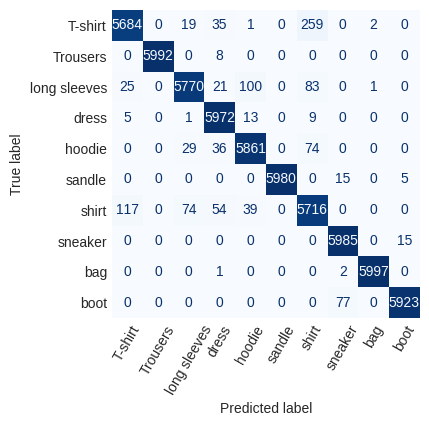

In [41]:
cm = confusion_matrix(y_true = data_df["label"].to_numpy(),
                      y_pred = y_pred.argmax(axis = 1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names.values())
fig, ax = plt.subplots(figsize = (4, 4))
disp.plot(ax = ax, cmap = "Blues", colorbar = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.grid(False)

In [42]:
y_pred = model.predict(test_ds)
accuracy_score(y_true = test_df["label"].to_numpy(),
               y_pred = y_pred.argmax(axis = 1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.9393

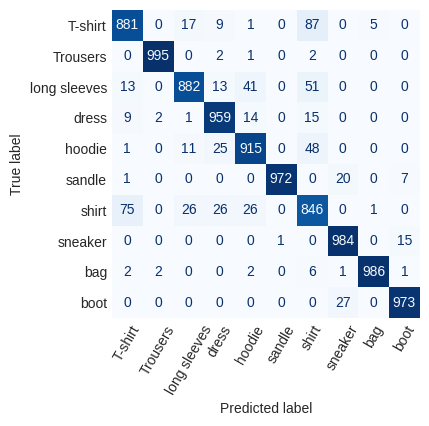

In [43]:
cm = confusion_matrix(y_true = test_df["label"].to_numpy(),
                      y_pred = y_pred.argmax(axis = 1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names.values())
fig, ax = plt.subplots(figsize = (4, 4))
disp.plot(ax = ax, cmap = "Blues", colorbar = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.grid(False)

In [44]:
hist_df = pd.DataFrame(history.history)
display(hist_df.head())

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.822400,0.512344,0.8906,0.308389,0.001
1,0.876900,0.349816,0.8877,0.300274,0.001
2,0.890250,0.308176,0.9071,0.260518,0.001
3,0.899700,0.280463,0.8989,0.274917,0.001
4,0.905867,0.260261,0.9038,0.261220,0.001


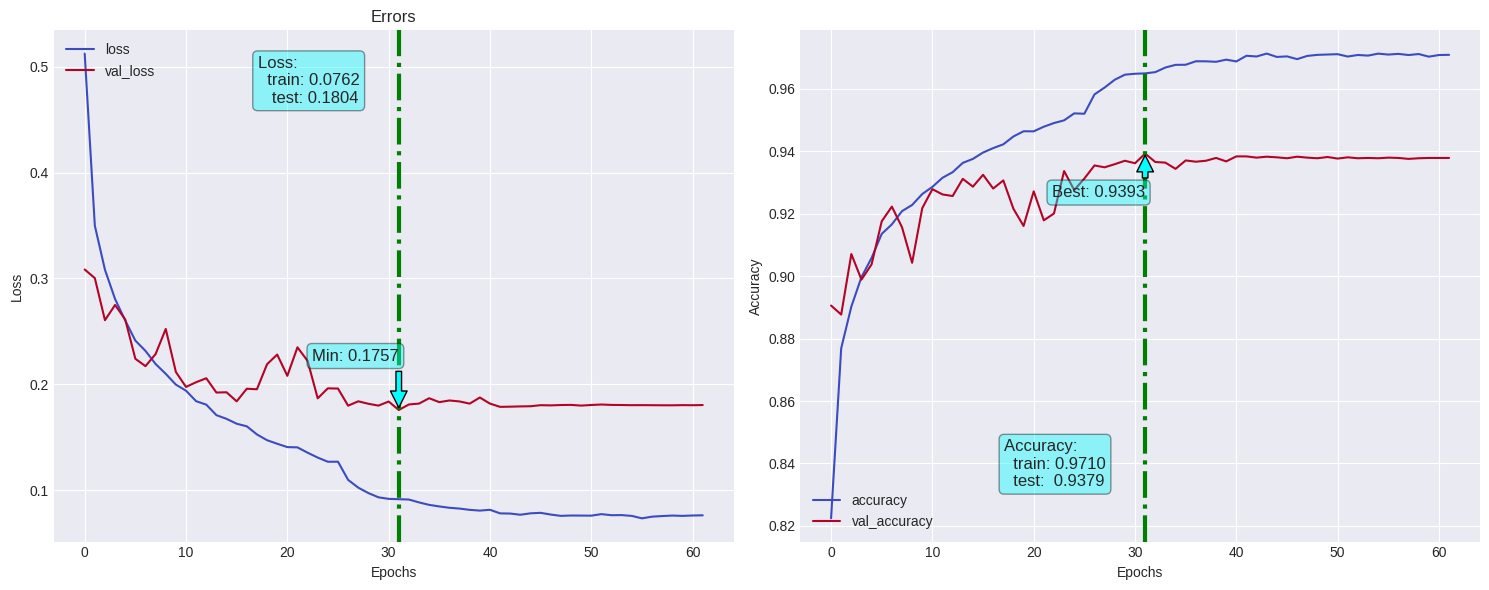

In [45]:
fn_plot_tf_hist(hist_df = hist_df)